In [1]:
%matplotlib inline
# %matplotlib notebook
import os;
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# For 3d plot
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# very limited information when exception is caught
%xmode Plain
# %pdb on or %ipdb on # enable debugger when exception occurred

Exception reporting mode: Plain


In [2]:
path = os.getcwd()+'/data/ex2data1.txt';
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head(5)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
data['Admitted'].head(5)

0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64

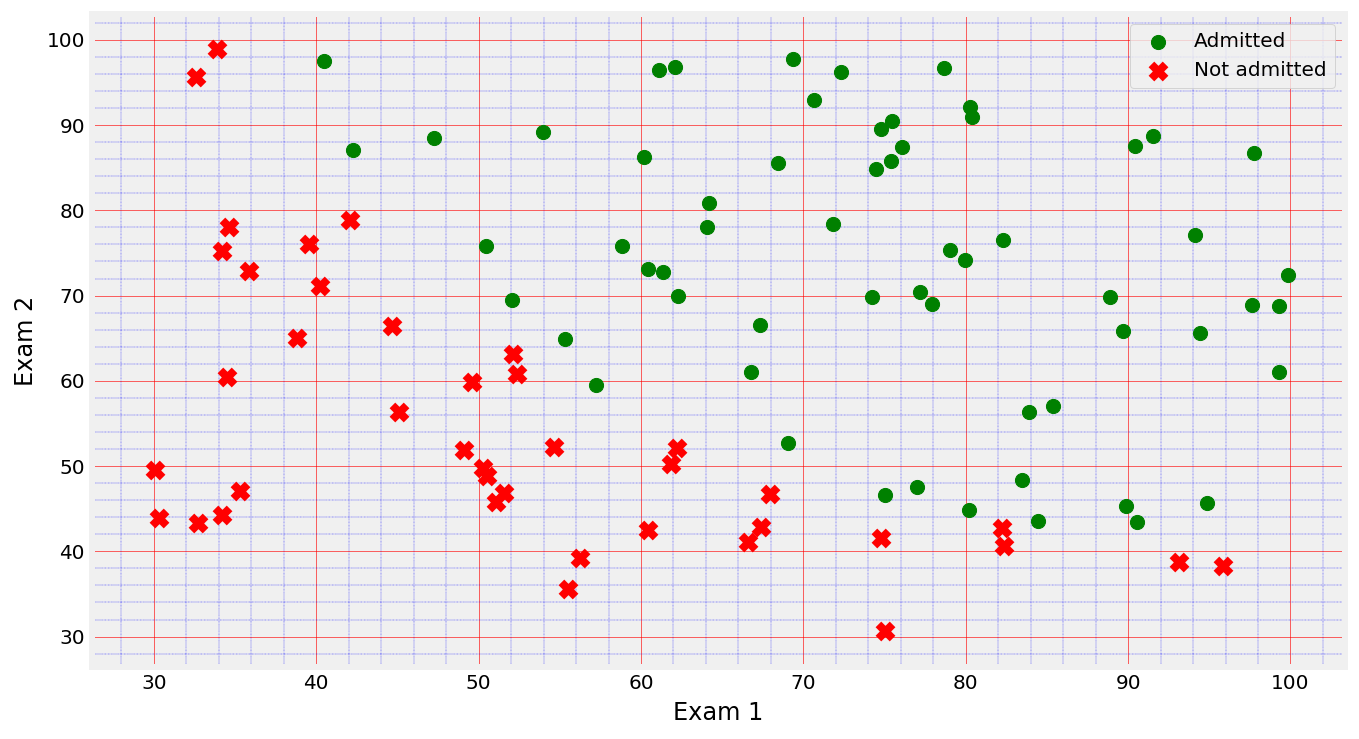

In [30]:
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = pos['Exam 1'], y = pos['Exam 2'], s=50, c = 'g', marker = 'o', label = 'Admitted')
ax.scatter(x = neg['Exam 1'], y = neg['Exam 2'], s=50, c = 'r', marker = 'x', label = 'Not admitted' )
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(loc = 1)
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [32]:
sigmoid(0)

0.5